In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
df_crop = pd.read_csv(r"C://Users/v-kas/OneDrive/Desktop/MachineLearning_project/Crop_Damage_Dataset.csv")
df_crop.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,Kharif,Alluvial,Insecticides,0,0.0,0,Summer,Minimal Damage
1,F00000003,209,Kharif,Alluvial,Insecticides,0,0.0,0,Monsoon,Partial Damage
2,F00000004,257,Kharif,Alluvial,Insecticides,0,0.0,0,Monsoon,Partial Damage
3,F00000005,257,Kharif,Black-Cotton,Insecticides,0,0.0,0,Monsoon,Partial Damage
4,F00000006,342,Kharif,Alluvial,Insecticides,0,0.0,0,Monsoon,Partial Damage


# Data Pre-Processing : Null Values, Outliers

In [3]:
df_crop.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

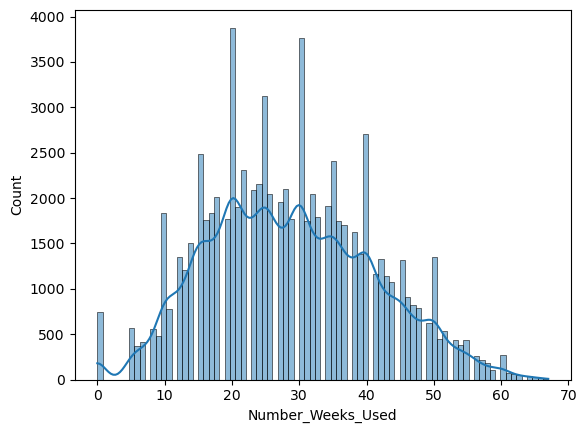

In [4]:
sns.histplot(data=df_crop, x='Number_Weeks_Used', kde=True)
plt.show()

In [5]:
# Calculating the mean values for the feature : Number_Weeks_Used 
mean = df_crop['Number_Weeks_Used'].mean()
print('The mean value of Number_Weeks_Used feature is:',mean)
# Filling the null values with the mean values for the feature Number_Weeks_Used
df_crop['Number_Weeks_Used'].fillna(mean, inplace=True)


The mean value of Number_Weeks_Used feature is: 28.62397004683313


In [6]:
le_Crop_Type = LabelEncoder()
df_crop['Crop_Type'] = le_Crop_Type.fit_transform(df_crop['Crop_Type'])
df_crop["Crop_Type"].unique()

array([0, 1])

In [7]:
le_Soil_Type = LabelEncoder()
df_crop['Soil_Type'] = le_Soil_Type.fit_transform(df_crop['Soil_Type'])
df_crop["Soil_Type"].unique()

array([0, 1])

In [8]:
le_Season = LabelEncoder()
df_crop['Season'] = le_Season.fit_transform(df_crop['Season'])
df_crop["Season"].unique()


array([1, 0, 2])

In [9]:
le_Pesticide_Use_Category = LabelEncoder()
df_crop['Pesticide_Use_Category'] = le_Pesticide_Use_Category.fit_transform(df_crop['Pesticide_Use_Category'])
df_crop["Pesticide_Use_Category"].unique()

array([2, 0, 1])

In [10]:
le_Crop_Damage = LabelEncoder()
df_crop['Crop_Damage'] = le_Crop_Damage.fit_transform(df_crop['Crop_Damage'])
df_crop["Crop_Damage"].unique()

array([0, 1, 2])

In [11]:
df_crop.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,0,0,2,0,0.0,0,1,0
1,F00000003,209,0,0,2,0,0.0,0,0,1
2,F00000004,257,0,0,2,0,0.0,0,0,1
3,F00000005,257,0,1,2,0,0.0,0,0,1
4,F00000006,342,0,0,2,0,0.0,0,0,1


In [12]:
df_crop.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [13]:
df_crop.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.715625,0.458417,0.735814,25.849952,28.623970,9.589986,0.702177,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,11.747567,9.900631,0.780100,0.454215
min,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,731.000000,0.000000,0.000000,0.000000,15.000000,20.000000,0.000000,0.000000,0.000000
50%,1212.000000,1.000000,0.000000,1.000000,20.000000,28.623970,7.000000,1.000000,0.000000
75%,1898.000000,1.000000,1.000000,1.000000,40.000000,36.000000,16.000000,1.000000,0.000000
max,4097.000000,1.000000,1.000000,2.000000,95.000000,67.000000,50.000000,2.000000,2.000000


In [14]:
# Shape the dataframe
df_crop.shape

(88858, 10)

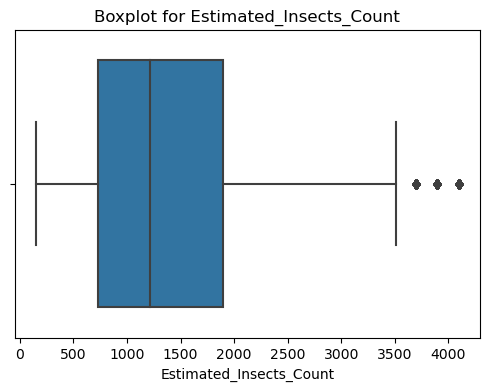

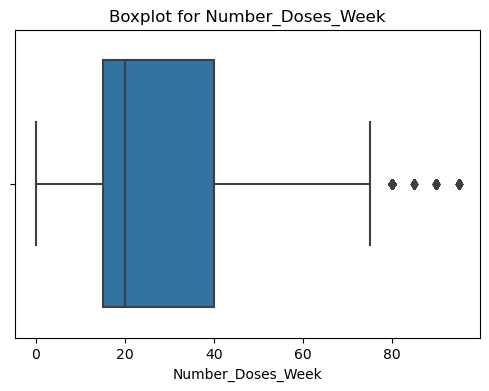

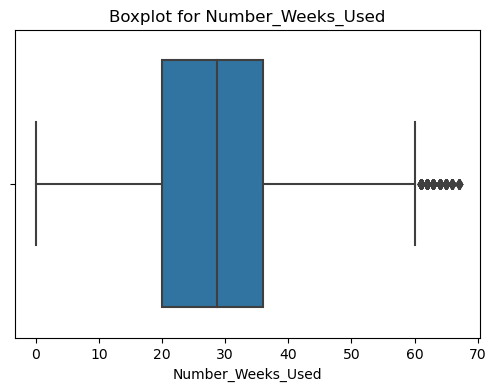

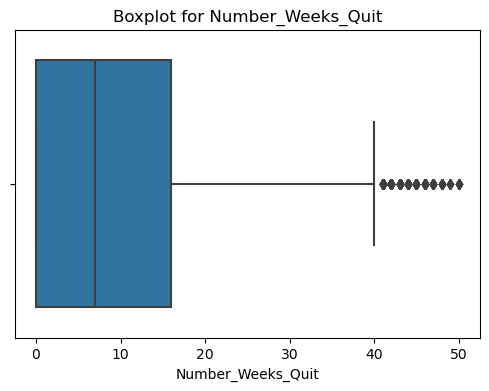

In [15]:
# Checking for outliers in the numerical features
# Select the numerical columns
numerical_columns = ['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit']

# Create a boxplot for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_crop[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


In [16]:
# Define the columns to check for outliers
columns = ['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit']

# Iterate over the columns
for column in columns:
    # Get the interquartile range (IQR) of the data
    q1 = df_crop[column].quantile(0.25)
    q3 = df_crop[column].quantile(0.75)
    iqr = q3 - q1

    # Define the threshold for outliers
    outlier_threshold = 1.5 * iqr

    # Find the outliers
    outliers = df_crop[(df_crop[column] < (q1 - outlier_threshold)) | (df_crop[column] > (q3 + outlier_threshold))][column]

    # Get the count of outliers
    outlier_count = len(outliers)

    print(f'There are {outlier_count} outliers in the {column} column.')
    
    # Remove the outliers
    df_crop = df_crop.drop(outliers.index)


There are 1452 outliers in the Estimated_Insects_Count column.
There are 791 outliers in the Number_Doses_Week column.
There are 199 outliers in the Number_Weeks_Used column.
There are 255 outliers in the Number_Weeks_Quit column.


In [17]:
# Count of observations after removing outliers:
df_crop.shape

(86161, 10)

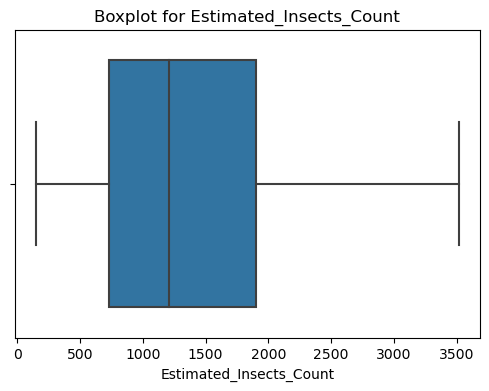

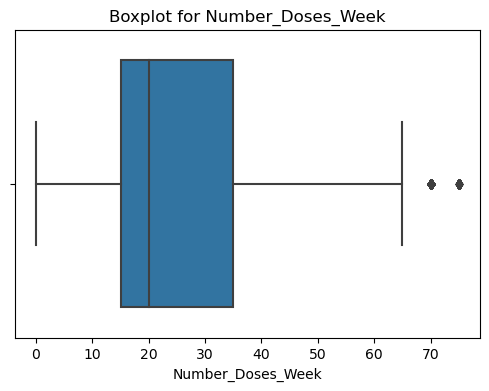

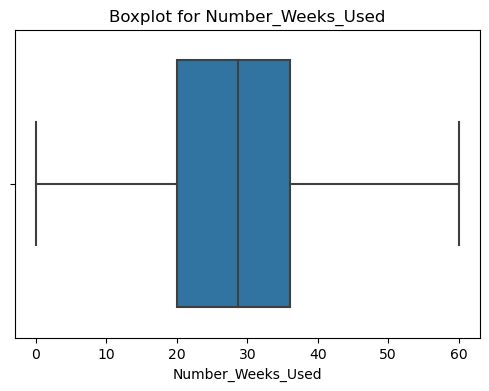

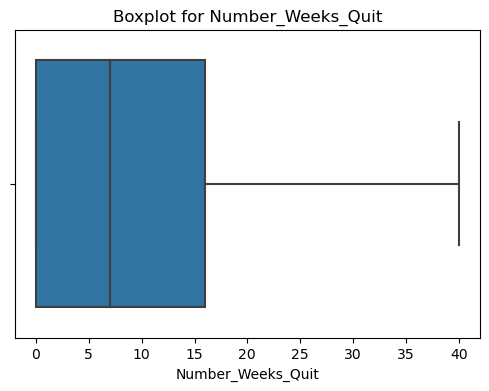

In [18]:
# Displaying this box plot to show the outliers has been taken care from the code in above cell
numerical_columns = ['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit']

# Create a boxplot for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_crop[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

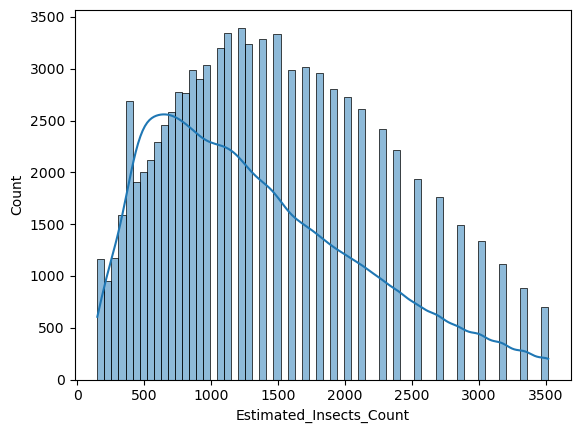

In [19]:
# Distribution of data in the Estimated_Insects_Count feature
sns.histplot(data=df_crop, x='Estimated_Insects_Count', kde=True)
plt.show()

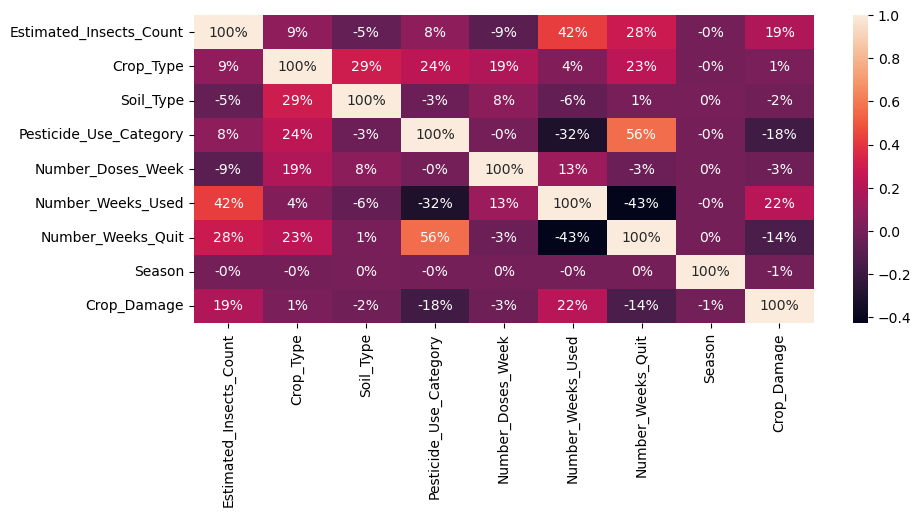

In [20]:
# Heat map to show the correlation matrix to know the relation between features
df_crop = df_crop.drop('ID', axis=1)

plt.figure(figsize=(10,4))
sns.heatmap(df_crop.corr(), annot=True, fmt='.0%')
plt.show()

# Exploratory Data Analysis: To understand the data and their relations with the target column

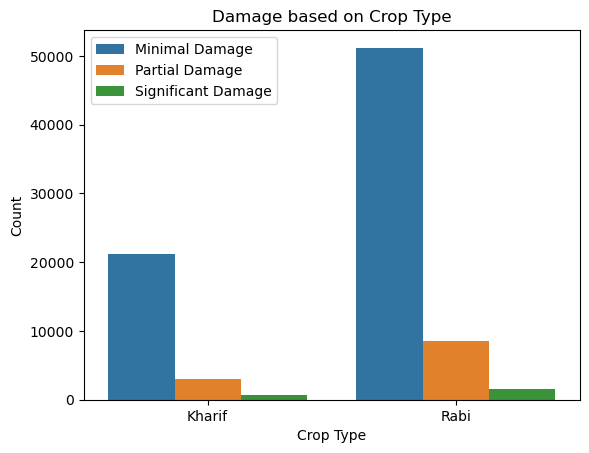

In [21]:
# Bar plot to show the relation between Crop Type vs Crop Damage features

sns.countplot(x='Crop_Type', hue='Crop_Damage', data=df_crop)
plt.title('Damage based on Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.legend(['Minimal Damage', 'Partial Damage', 'Significant Damage'])

# set the x-axis tick labels
plt.xticks([0, 1], ['Kharif','Rabi'])
plt.show()

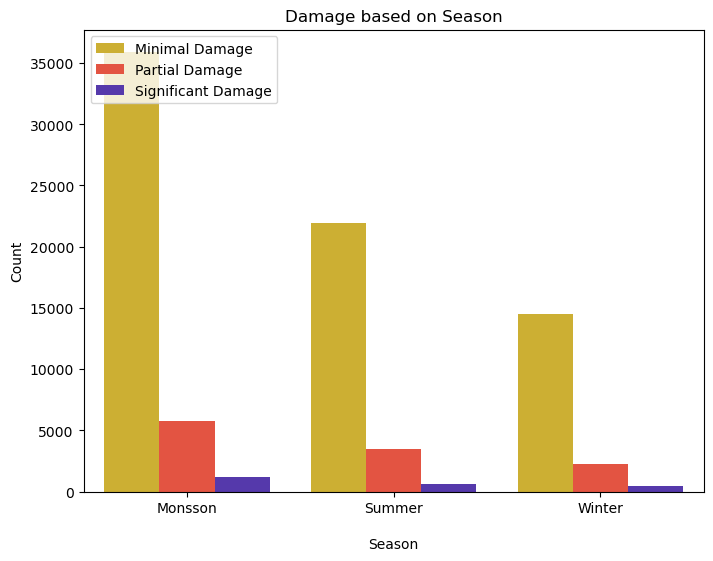

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Season', hue='Crop_Damage', data=df_crop, palette='CMRmap_r')
plt.title('Damage based on Season')
plt.xlabel('\nSeason')
plt.ylabel('Count')
plt.legend(['Minimal Damage', 'Partial Damage', 'Significant Damage'], loc='upper left')
plt.xticks([0, 1,2], [ 'Monsson','Summer','Winter'])
plt.show()

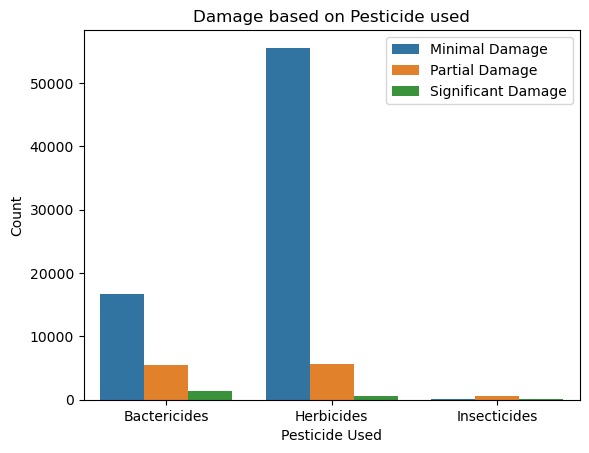

In [23]:
# Bar plot to show the relation between pesticide used vs Crop Damage features
sns.countplot(x='Pesticide_Use_Category', hue='Crop_Damage', data=df_crop)
plt.title('Damage based on Pesticide used')
plt.xlabel('Pesticide Used')
plt.ylabel('Count')
plt.legend(['Minimal Damage', 'Partial Damage', 'Significant Damage'])
plt.xticks([0, 1,2], [ 'Bactericides','Herbicides','Insecticides'])
plt.show()

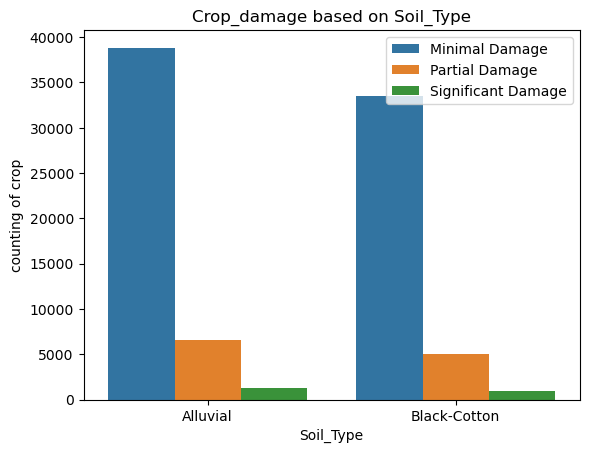

Soil_Type  Crop_Damage
0          0              38842
           1               6523
           2               1265
1          0              33517
           1               5056
           2                958
Name: Crop_Damage, dtype: int64


In [24]:
# Bar plot to show the relation between Soil Type vs Crop Damage features
sns.countplot(x='Soil_Type',hue='Crop_Damage',data=df_crop)
plt.title('Crop_damage based on Soil_Type')
plt.xlabel('Soil_Type')
plt.ylabel('counting of crop')
plt.legend(['Minimal Damage', 'Partial Damage', 'Significant Damage'])
plt.xticks([0, 1], [ 'Alluvial','Black-Cotton'])
plt.show()
print(df_crop.groupby('Soil_Type')['Crop_Damage'].value_counts())

C:\Users\v-kas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


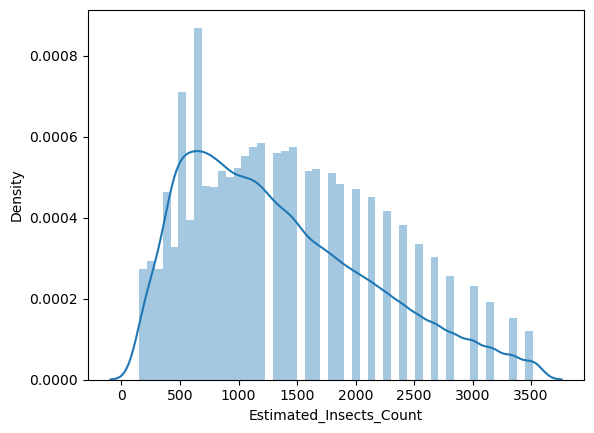

C:\Users\v-kas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


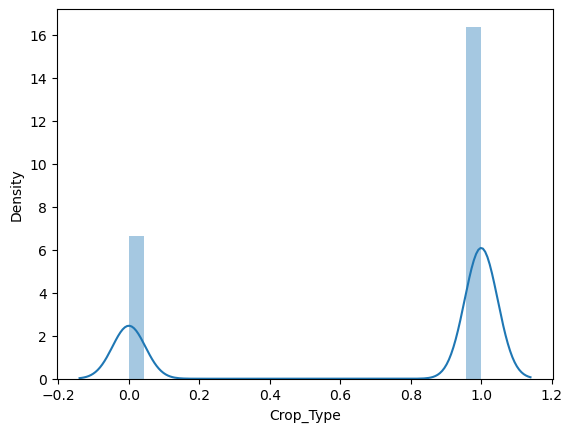

C:\Users\v-kas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


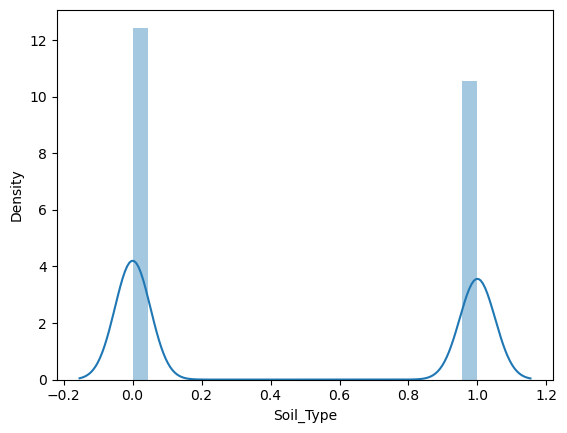

C:\Users\v-kas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


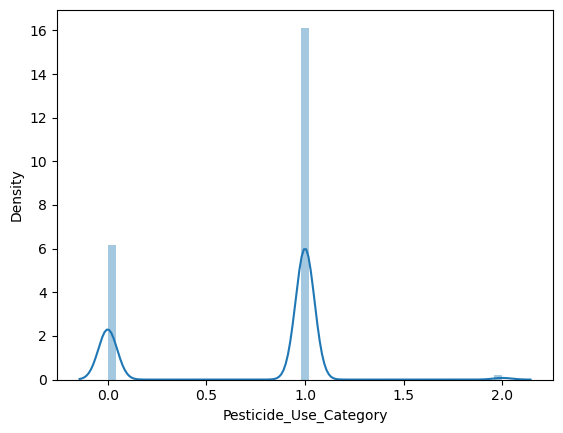

C:\Users\v-kas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


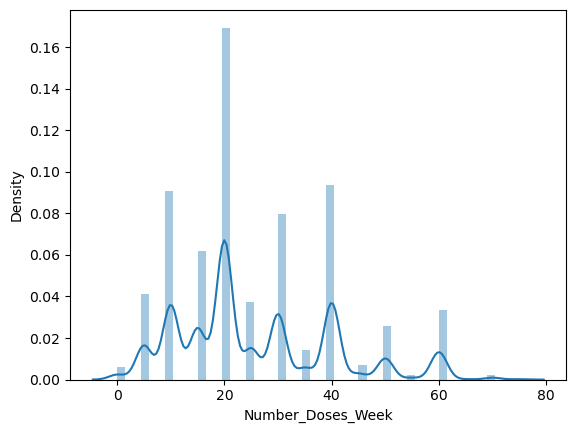

C:\Users\v-kas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


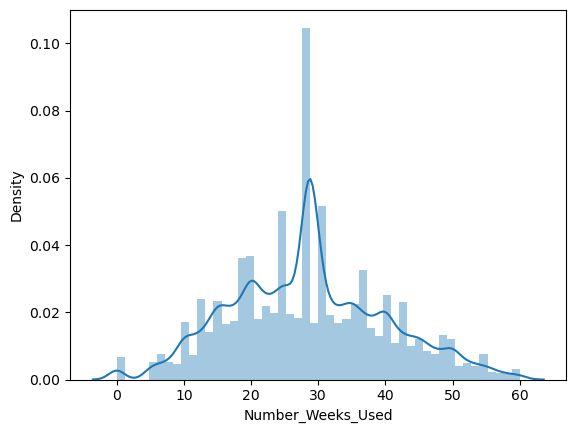

C:\Users\v-kas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


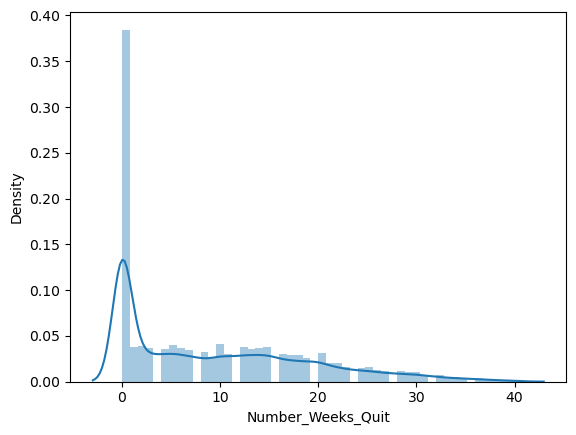

C:\Users\v-kas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


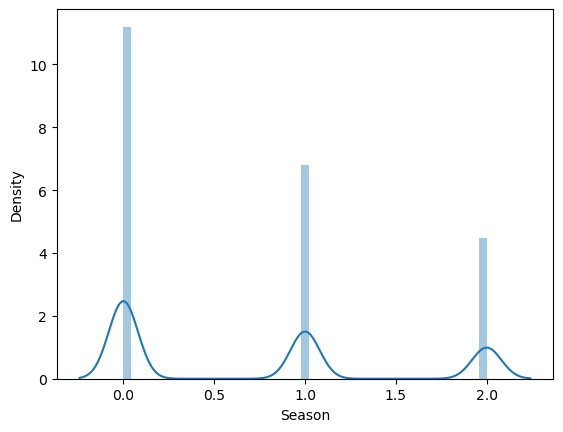

C:\Users\v-kas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


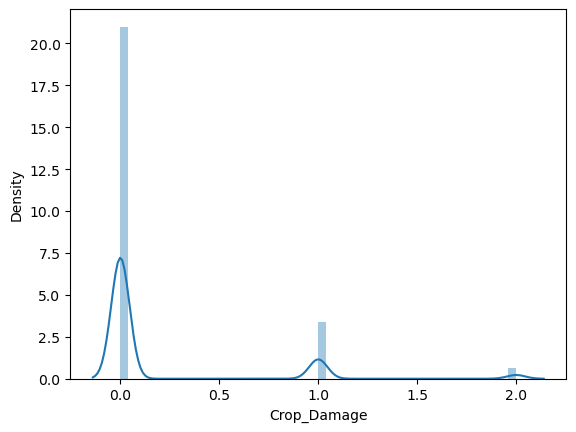

In [25]:
# Distribution of data in all the features
for i in df_crop.columns:
    sns.distplot(df_crop[i])
    plt.show()

In [26]:
df_crop.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,0,0,2,0,0.0,0,1,0
1,209,0,0,2,0,0.0,0,0,1
2,257,0,0,2,0,0.0,0,0,1
3,257,0,1,2,0,0.0,0,0,1
4,342,0,0,2,0,0.0,0,0,1


In [27]:
ratio_crop_damage = pd.DataFrame([df_crop['Crop_Damage'].value_counts(),df_crop['Crop_Damage'].value_counts()/df_crop.shape[0]*100])
print(ratio_crop_damage)

                        0             1            2
Crop_Damage  72359.000000  11579.000000  2223.000000
Crop_Damage     83.981152     13.438795     2.580054


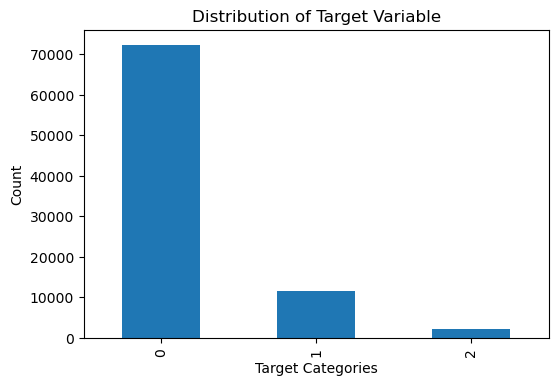

In [28]:
plt.figure(figsize=(6,4))
df_crop['Crop_Damage'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Categories')
plt.ylabel('Count')
plt.show()

In [29]:
# Split the data into training and testing sets
X = df_crop.drop(['Crop_Damage','Crop_Type'], axis=1)
y = df_crop['Crop_Damage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60312, 7) (60312,)
(25849, 7) (25849,)


# XG Boost  with out SMOTE

In [31]:
import time
import xgboost 
xgb=xgboost.XGBClassifier()
xg_start_time = time.time()
xgb.fit(X_train, y_train)

xg_end_time = time.time()

# Calculate the training time
xg_training_time = xg_end_time - xg_start_time
print("Training time: {:.4f} seconds".format(xg_training_time))
y_pred_xg=xgb.predict(X_test)
xg_accuracy = accuracy_score(y_test,y_pred_xg)
print('Accuracy score :',xg_accuracy)
print('_________________________________________________________________________')
cm_xg = confusion_matrix(y_test, y_pred_xg)
print('Confusion matrix:\n', cm_xg)
print('_________________________________________________________________________')
cm_mat = [[21284, 434, 5],
      [2753, 694, 6],
      [445, 225, 3]]

# Calculate percentage for target feature 0
T0 = (cm_mat[0][0] / sum(cm_mat[0])) * 100
print("Percentage for target feature 0:", T0)

# Calculate percentage for target feature 1
T1 = (cm_mat[1][1] / sum(cm_mat[1])) * 100
print("Percentage for target feature 1:", T1)

# Calculate percentage for target feature 2
T2 = (cm_mat[2][2] / sum(cm_mat[2])) * 100
print("Percentage for target feature 2:", T2)

print('_________________________________________________________________________')


Training time: 4.3478 seconds
Accuracy score : 0.8503617161205462
_________________________________________________________________________
Confusion matrix:
 [[21284   434     5]
 [ 2753   694     6]
 [  445   225     3]]
_________________________________________________________________________
Percentage for target feature 0: 97.97910049256548
Percentage for target feature 1: 20.09846510280915
Percentage for target feature 2: 0.44576523031203563
_________________________________________________________________________


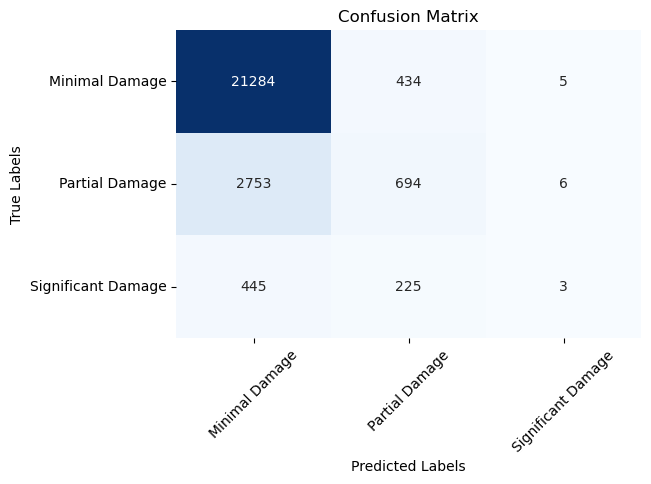

In [38]:
# cm_gnb_smot = confusion_matrix(y_test, y_pred_gnb_smot)

# Define the label names
label_names = ['Minimal Damage', 'Partial Damage', 'Significant Damage']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xg, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=45)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [32]:
cr_xb = classification_report(y_test, y_pred_xg)
print('Classification report:\n', cr_xb)

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     21723
           1       0.51      0.20      0.29      3453
           2       0.21      0.00      0.01       673

    accuracy                           0.85     25849
   macro avg       0.53      0.40      0.41     25849
weighted avg       0.80      0.85      0.81     25849



# XG BOOST WITH SMOTE

In [33]:
from imblearn.over_sampling import SMOTE
# Split the data into training and testing sets
smote = SMOTE()
warnings.filterwarnings('ignore')

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Train your model on the new training set
xgb_smote=xgboost.XGBClassifier()
xg_smote_start_time = time.time()
xgb_smote.fit(X_train_smote, y_train_smote)
xg_smote_end_time = time.time()

# Calculate the training time
xg_smote_training_time = xg_smote_end_time - xg_smote_start_time
print("Training time: {:.4f} seconds".format(xg_smote_training_time))
# Evaluate your model on the test set
y_pred_xgs = xgb_smote.predict(X_test)
xg_smote_accuracy = accuracy_score(y_test,y_pred_xgs)
print('Accuracy score :',xg_smote_accuracy)
print('_________________________________________________________________________')
# from sklearn.metrics import accuracy_score, f1_score
# print('f1 score :',f1_score(y_test,y_pred_xgs,average='weighted'))

# Confusion matrix
cm_mat1 = [[19844,1553,326],
          [2075,1049,329],
          [291,277,105]]

# Calculate percentage for target feature 0
T0_Smote = (cm_mat1[0][0] / sum(cm_mat1[0])) * 100
print("Percentage for target feature 0:", T0_Smote)

# Calculate percentage for target feature 1
T1_Smote = (cm_mat1[1][1] / sum(cm_mat1[1])) * 100
print("Percentage for target feature 1:", T1_Smote)

# Calculate percentage for target feature 2
T2_Smote = (cm_mat1[2][2] / sum(cm_mat1[2])) * 100
print("Percentage for target feature 2:", T2_Smote)
print('_________________________________________________________________________')

cm_xb_smote = confusion_matrix(y_test, y_pred_xgs)
print('Confusion matrix:\n', cm_xb_smote)
print('_________________________________________________________________________')
# Get the classification report
cr_xb_smote = classification_report(y_test, y_pred_xgs)
print('Classification report:\n', cr_xb_smote)


Training time: 15.8922 seconds
Accuracy score : 0.8103988548880035
_________________________________________________________________________
Percentage for target feature 0: 91.3501818349215
Percentage for target feature 1: 30.37938024905879
Percentage for target feature 2: 15.601783060921248
_________________________________________________________________________
Confusion matrix:
 [[19832  1553   338]
 [ 2089   997   367]
 [  285   269   119]]
_________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     21723
           1       0.35      0.29      0.32      3453
           2       0.14      0.18      0.16       673

    accuracy                           0.81     25849
   macro avg       0.46      0.46      0.46     25849
weighted avg       0.80      0.81      0.81     25849



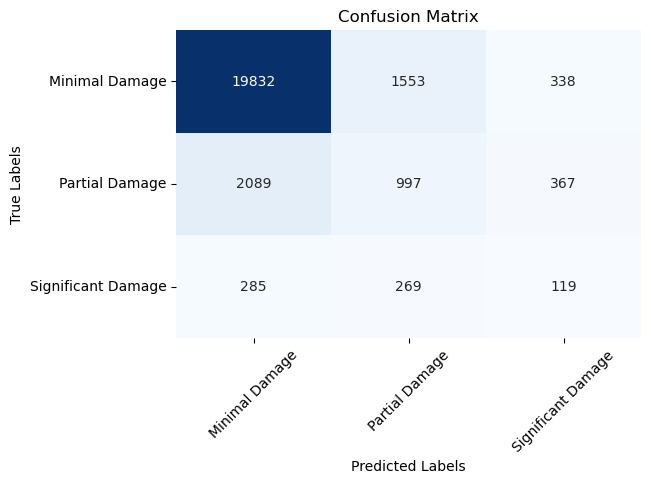

In [39]:
# cm_gnb_smot = confusion_matrix(y_test, y_pred_gnb_smot)

# Define the label names
label_names = ['Minimal Damage', 'Partial Damage', 'Significant Damage']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xb_smote, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=45)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# XG BOOST WITH SMOTE WITH HYPERPARAMETER TUNING

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Create an instance of the XGBClassifier
xgb_p = XGBClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_p, param_grid=param_grid, cv=5)

xg_GS_start_time = time.time()
grid_search.fit(X_train_smote, y_train_smote)

xg_GS_end_time = time.time()

# Calculate the training time
xg_GS_training_time = xg_GS_end_time - xg_GS_start_time
print("Training time: {:.4f} seconds".format(xg_GS_training_time))

print('_________________________________________________________________________')
# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)

# Evaluate the model on the test set using the best hyperparameters
y_pred_hyp = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_hyp)
print("Accuracy score: ", accuracy)
print('_________________________________________________________________________')
cm_hyp = confusion_matrix(y_test, y_pred_hyp)
print('Confusion matrix:\n', cm_hyp)

print('_________________________________________________________________________')
# Confusion matrix
cm_mat_hyp = [[20664,1336,247],
      [2204,1068,331],
      [331,263,111]]

# Calculate percentage for target feature 0
T0_hyp = (cm_mat_hyp[0][0] / sum(cm_mat_hyp[0])) * 100
print("Percentage for target feature 0:", T0_hyp)

# Calculate percentage for target feature 1
T1_hyp = (cm_mat_hyp[1][1] / sum(cm_mat_hyp[1])) * 100
print("Percentage for target feature 1:", T1_hyp)

# Calculate percentage for target feature 2
T2_hyp = (cm_mat_hyp[2][2] / sum(cm_mat_hyp[2])) * 100
print("Percentage for target feature 2:", T2_hyp)
print('_________________________________________________________________________')



Training time: 3727.0133 seconds
_________________________________________________________________________
Best parameters:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}
Accuracy score:  0.8228558164725908
_________________________________________________________________________
Confusion matrix:
 [[20198  1293   232]
 [ 2170   986   297]
 [  304   283    86]]
_________________________________________________________________________
Percentage for target feature 0: 92.88443385625028
Percentage for target feature 1: 29.64196502914238
Percentage for target feature 2: 15.74468085106383
_________________________________________________________________________


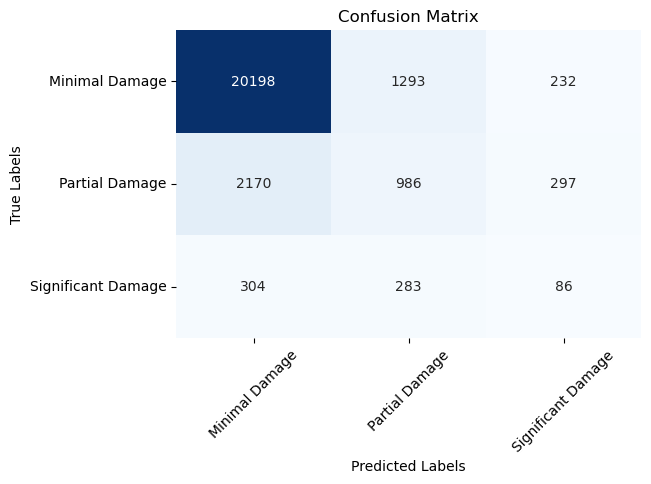

In [40]:
# cm_gnb_smot = confusion_matrix(y_test, y_pred_gnb_smot)

# Define the label names
label_names = ['Minimal Damage', 'Partial Damage', 'Significant Damage']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_hyp, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=45)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
cr_xb_smote_HYP = classification_report(y_test, y_pred_hyp)
print('Classification report:\n', cr_xb_smote_HYP)

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     21723
           1       0.38      0.29      0.33      3453
           2       0.14      0.13      0.13       673

    accuracy                           0.82     25849
   macro avg       0.47      0.45      0.46     25849
weighted avg       0.80      0.82      0.81     25849



In [36]:
# SVM

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
scaler = StandardScaler()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

import time

svm_model = SVC(kernel='linear')

svm_start_time = time.time()

# Train the SVM model on the training set
svm_model.fit(X_train, y_train)
svm_end_time = time.time()

# Calculate the training time
svm_training_time = svm_end_time - svm_start_time
print("Training time: {:.4f} seconds".format(svm_training_time))
# Predict the target variable for the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the performance of the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", svm_accuracy)

# SVM with smote

In [ ]:
X_train_smote = pca.fit_transform(X_train_smote)
X_test = pca.transform(X_test)
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)


svm_model_smot = SVC(kernel='linear')

svm_smot_start_time = time.time()

# Train the SVM model on the training set
svm_model_smot.fit(X_train_smote, y_train_smote)
svm_smot_end_time = time.time()

# Calculate the training time
svm_smot_training_time = svm_smot_end_time - svm_smot_start_time
print("Training time: {:.4f} seconds".format(svm_smot_training_time))
# Predict the target variable for the test set
y_pred_svm_smot = svm_model_smot.predict(X_test)

# Evaluate the performance of the model
svm_accuracy_smot = accuracy_score(y_test, y_pred_svm_smot)
print("Accuracy:", svm_accuracy_smot)

In [ ]:
print('_________________________________________________________________________')
cm_svm_smot = confusion_matrix(y_test, y_pred_svm_smot)
print('Confusion matrix:\n', cm_svm_smot)

print('_________________________________________________________________________')
cr_svm_smot = classification_report(y_test, y_pred_svm_smot)
print('Classification report:\n', cr_svm_smot)

# SVM hyper parameter tuning with Smote

In [ ]:
svm_model = SVC()
from bayes_opt import BayesianOptimization
# define the hyperparameter space for the SVM model
pbounds = {'C': (0.1, 10), 'gamma': (0.01, 1)}

# define the objective function to maximize (i.e., the cross-validation accuracy)
def svm_objective(C, gamma):
    svm_model.set_params(C=C, gamma=gamma)
    return cross_val_score(svm_model, x_train, y_train, cv=5).mean()

# create the Bayesian optimizer object and run the optimization
bayes_optimizer = BayesianOptimization(f=svm_objective, pbounds=pbounds, random_state=42)
bayes_optimizer.maximize(init_points=5, n_iter=20)

# get the best hyperparameters found by the optimizer
best_params = bayes_optimizer.max['params']

# retrain the SVM model using the best hyperparameters and evaluate its performance on the test set
svm_model.set_params(**best_params)
svm_model.fit(X_train_smote, y_train_smote)
test_acc = svm_model.score(X_test, y_test)

In [ ]:
import pickle

In [ ]:

x = np.array([[300,"Alluvial","Insecticides",0,2,3,"Summer"]])
x

In [ ]:
# x[:, ] = test_le_Crop_Type.transform(x[:,1])
x[:, 1] = test_le_Soil_Type.transform(x[:,1])
x[:, 6] = test_le_Season.transform(x[:,6])
x[:, 2] = test_le_Pesticide_Use_Category.transform(x[:,2])
x = x.astype(float)
x

In [ ]:

y_pred = xgb_smote.predict(x)
y_pred_original = le_Crop_Damage.inverse_transform(y_pred)
y_pred_original

In [ ]:

data = {"model": xgb_smote, "test_le_Soil_Type": test_le_Soil_Type,
        "test_le_Pesticide_Use_Category":test_le_Pesticide_Use_Category,
        "test_le_Season":test_le_Season}
with open('Cropdamage_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('Cropdamage_model.pkl', 'rb') as file:
    data = pickle.load(file)

xg_loaded = data["model"]
# le_Crop_Type = data["le_Crop_Type"]
test_le_Soil_Type = data["test_le_Soil_Type"]
test_le_Pesticide_Use_Category = data["test_le_Pesticide_Use_Category"]
test_le_Season = data["test_le_Season"]

In [ ]:
y_pred = xg_loaded.predict(x)
y_pred_original = test_le_Crop_Damage.inverse_transform(y_pred)
y_pred_original

In [ ]:

data_xg = {"model": grid_search, "test_le_Soil_Type": test_le_Soil_Type,
        "test_le_Pesticide_Use_Category":test_le_Pesticide_Use_Category,
        "test_le_Season":test_le_Season}
with open('Cropdamage_model_xg.pkl', 'wb') as file:
    pickle.dump(data_xg, file)

In [ ]:
with open('Cropdamage_model_xg.pkl', 'rb') as file:
    data_xg = pickle.load(file)

xg_hyp_model = data_xg["model"]
# le_Crop_Type = data["le_Crop_Type"]
test_le_Soil_Type = data_xg["test_le_Soil_Type"]
test_le_Pesticide_Use_Category = data_xg["test_le_Pesticide_Use_Category"]
test_le_Season = data_xg["test_le_Season"]

In [ ]:
y_pred_hyp = xg_hyp_model.predict(x)
y_pred_original = test_le_Crop_Damage.inverse_transform(y_pred_hyp)
y_pred_original